In [229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [231]:
class SigmoidNeuron:
    
    def __init__(self):
        self.W = None
        self.B = None
        
    def perceptron(self,X):
        return np.dot(X,(self.W.T))+ self.B
        
    def sigmoid(self,x):
        return (1.0/(1.0+(np.exp(-(x)))))
    
    def grad_w(self,x,y):
        fx = self.sigmoid(self.perceptron(x))
        return (fx-y)*(1-fx)*(fx)*x
    
    def grad_b(self,x,y):
        fx = self.sigmoid(self.perceptron(x))
        return (fx-y)*(1-fx)*(fx)
    
    def predict(self,X):
            Y_pred =[]
            for x in X:
                y_p = self.sigmoid(self.perceptron(x))
                Y_pred.append(y_p)
            return np.array(Y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=False,display_loss=False):
        if initialise:
            self.W = np.random.randn(1,X.shape[1])
            self.B=0
        
        if display_loss:
            loss={}
            
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+= self.grad_w(x,y)
                db+= self.grad_b(x,y)
            self.W -= learning_rate*dw
            self.B -= learning_rate*db
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i]=mean_squared_error(Y_pred,Y)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
        
  

# load data

In [203]:
data = pd.read_csv('mobile_cleaned.csv')

In [204]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [205]:
data.describe()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,232.970674,344.211144,5.462317,161.343109,11.120235,1.792551,72.353343,149.946394,46.369501,3191.307918,...,0.002933,0.055718,0.002933,0.759531,0.152493,0.085044,0.020528,0.020528,0.958944,4.072434
std,137.231746,88.161129,0.742529,22.305556,61.320855,0.451598,9.357839,9.192305,46.435453,932.533527,...,0.054153,0.229714,0.054153,0.427996,0.360026,0.279357,0.142006,0.142006,0.198711,0.377066
min,0.000000,143.000000,2.400000,58.000000,1.000000,1.000000,23.600000,115.600000,0.000000,1020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,110.000000,282.000000,5.200000,150.000000,2.000000,1.400000,68.800000,146.200000,16.000000,2900.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.900000
50%,229.000000,326.000000,5.500000,161.000000,3.000000,1.800000,72.500000,151.300000,32.000000,3055.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.100000
75%,354.000000,403.000000,6.000000,172.000000,4.000000,2.200000,77.480000,156.200000,64.000000,3750.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.300000
max,472.000000,576.000000,6.590000,330.000000,512.000000,2.800000,87.660000,174.100000,512.000000,13000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [206]:
data.shape

(341, 88)

In [207]:
Y=data['Rating']
X=data.drop('Rating',axis=1)


In [208]:
threshold=4.2
data['Class'] = (data['Rating']>=threshold).astype(np.int)

In [209]:
Y_binarised=data['Class'].values

In [210]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,stratify=Y_binarised)

In [211]:
print(x_train.shape,x_test.shape)

(255, 87) (86, 87)


In [212]:
stdsc = StandardScaler()

In [213]:
x_train_scaled=stdsc.fit_transform(x_train)

In [214]:
x_test_scaled=stdsc.transform(x_test)

In [215]:
Y

0      4.5
1      4.5
2      4.4
3      4.3
4      4.4
      ... 
336    3.8
337    3.9
338    4.1
339    3.6
340    4.3
Name: Rating, Length: 341, dtype: float64

In [216]:
mms=MinMaxScaler()

In [217]:
y_train_scaled=mms.fit_transform(np.asarray(y_train).reshape(-1,1))
y_test_scaled=mms.fit_transform(np.asarray(y_test).reshape(-1,1))

In [218]:
mms.transform(np.asarray(y_test).reshape(-1,1))

array([[0.88888889],
       [0.72222222],
       [0.77777778],
       [0.33333333],
       [0.16666667],
       [0.88888889],
       [0.77777778],
       [0.55555556],
       [0.5       ],
       [0.61111111],
       [0.        ],
       [0.72222222],
       [0.66666667],
       [0.5       ],
       [0.66666667],
       [0.72222222],
       [0.77777778],
       [0.77777778],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.61111111],
       [0.61111111],
       [0.61111111],
       [0.61111111],
       [0.66666667],
       [0.66666667],
       [0.55555556],
       [0.72222222],
       [0.66666667],
       [0.22222222],
       [0.38888889],
       [0.38888889],
       [0.55555556],
       [0.27777778],
       [0.22222222],
       [0.55555556],
       [0.77777778],
       [0.77777778],
       [0.77777778],
       [0.72222222],
       [0.94444444],
       [0.55555556],
       [0.77777778],
       [0.72222222],
       [0.72222222],
       [0.83333333],
       [0.   

In [219]:
scaled_threshold=list(mms.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [220]:
scaled_threshold

0.6666666666666667

In [221]:
y_train_binarised = ((y_train_scaled>scaled_threshold).astype(np.int)).ravel()

In [222]:
y_test_binarised=((y_test_scaled>scaled_threshold).astype(np.int)).ravel()

# train on real data

In [232]:
sn=SigmoidNeuron()

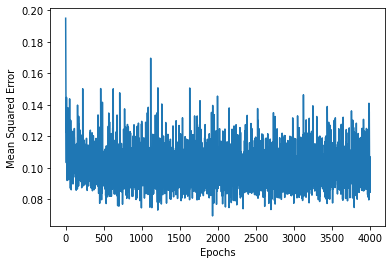

In [235]:
sn.fit(x_train_scaled,y_train_scaled,epochs=4000,learning_rate=0.5,initialise=True,display_loss=True)

In [236]:
y_pred_train = sn.predict(x_train_scaled)
y_pred_test = sn.predict(x_test_scaled
                        )

In [237]:
y_pred_train_binarised = ((y_pred_train>scaled_threshold).astype(np.int)).ravel()
y_pred_test_binarised = ((y_pred_test>scaled_threshold).astype(np.int)).ravel()

In [238]:
from sklearn.metrics import accuracy_score

In [239]:
accuracy_train=accuracy_score(y_pred_train_binarised,y_train_binarised)

In [240]:
accuracy_test=accuracy_score(y_pred_test_binarised,y_test_binarised)

In [241]:
print('train acc:',accuracy_train,'test acc:',accuracy_test)

train acc: 0.6745098039215687 test acc: 0.5232558139534884


# exersices



1- Plot on a diffrent datasets
2- diffrent toy points
3- try diffrent hyperparameters
4- co-relate between (epachs,lr,mean square error, accuracy)

5-

In [269]:
y = []
for i in range(1,8):
    y.append(1/(2**i))

In [270]:
y.append(y[6])

In [271]:
y

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.0078125]

In [272]:
y_hat = y[::-1]

In [274]:
y_hat

[0.0078125, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5]

In [284]:
KLD = np.sum((y*np.log2(y))-np.sum(y*np.log2(y_hat)))

In [285]:
KLD

50.078125

Level 1 competition link: https://www.kaggle.com/t/bde616c5bf8c44d8bdae110ce541e8d5

Level 2 competiton link:  https://www.kaggle.com/t/5c12672a52bc4f1ab7e5e82a390af200

Level 3:  https://www.kaggle.com/t/657b2899610a45efbf46d8c3c8788be6

Level 4: https://www.kaggle.com/t/8036923f3f454b59beed0d83fdb8a3a3

Level 5: https://www.kaggle.com/t/474ddf8893fe4ed78a36ca21ae3c9e12

In [286]:
a=np.asarray([2.1,4.5,1.1])

In [287]:
def softmax(a):
    a_exp=np.exp(a)
    return (a_exp/(np.sum(a_exp)))

In [288]:
softmax(a)

array([0.08070337, 0.88960752, 0.02968911])